In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
df=sns.load_dataset("mpg")

In [100]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [101]:
df["horsepower"].fillna(df["horsepower"].mean(),inplace=True)

In [102]:
df=df.drop(["name"],axis=1)

In [10]:
df["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [43]:
cylinders=df["cylinders"].value_counts().index
cylinders_values=df["cylinders"].value_counts().values

In [45]:
cylinders_values

array([204, 103,  84,   4,   3], dtype=int64)

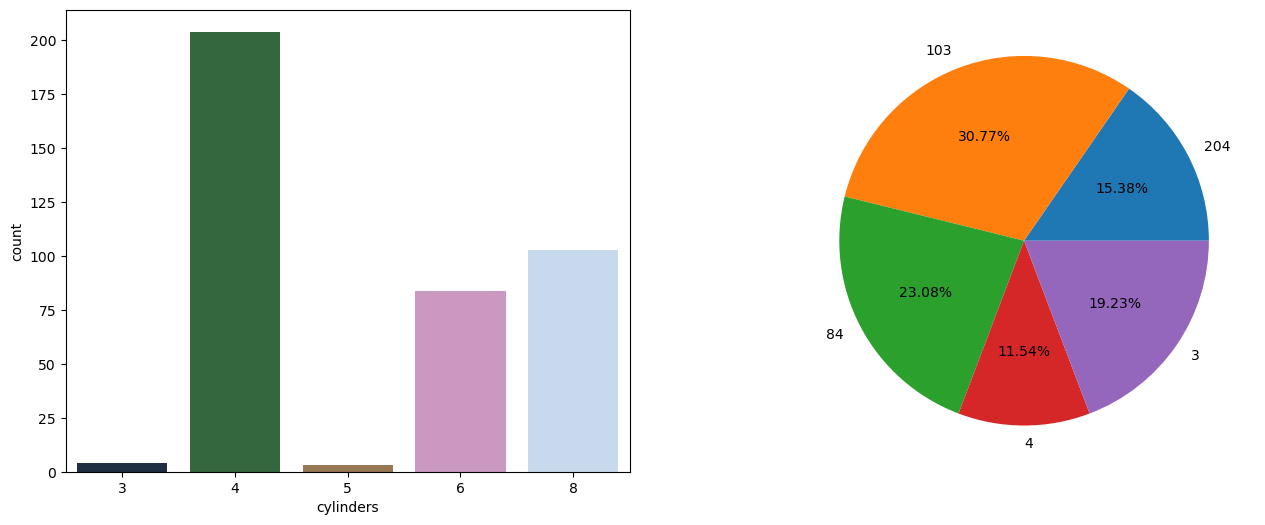

In [56]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
sns.countplot(data=df,x="cylinders",palette='cubehelix',ax=ax1)
ax2.pie(x=cylinders,labels=cylinders_values,autopct="%1.2f%%")
plt.show()

In [103]:
df["model_year"]=df["model_year"]+1900

In [95]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger


<Axes: xlabel='model_year', ylabel='count'>

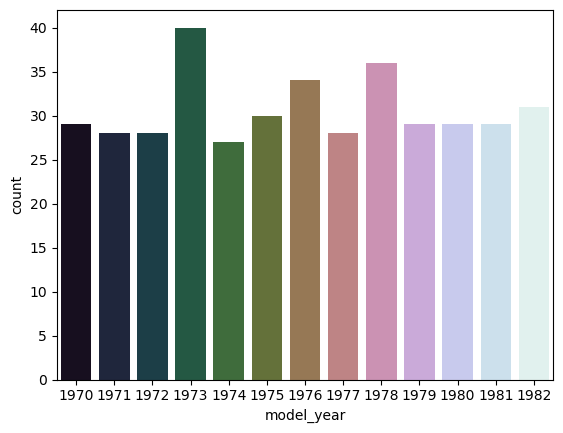

In [61]:
sns.countplot(x="model_year",data=df,palette='cubehelix')

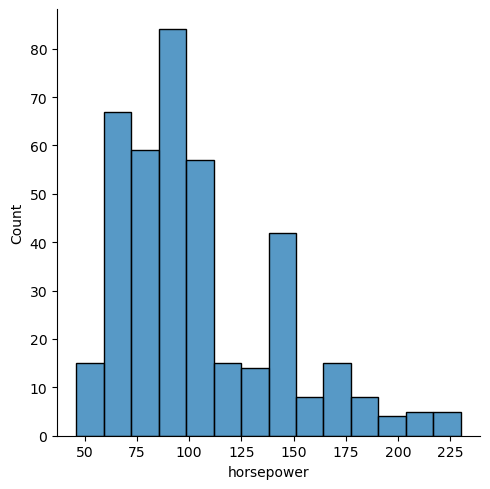

In [65]:
sns.displot(df["horsepower"])
plt.show()

<Axes: xlabel='horsepower', ylabel='mpg'>

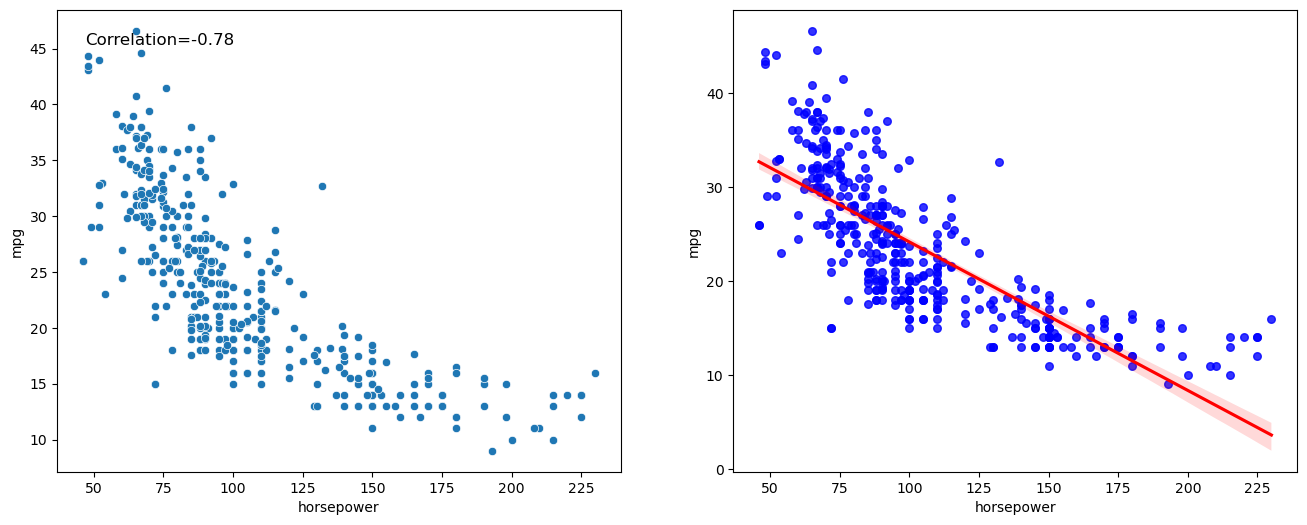

In [79]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(data=df,x="horsepower",y="mpg",ax=ax1)

correlation=df[["horsepower","mpg"]].corr().iloc[0,1]
ax1.text(0.05,0.95,f'Correlation={correlation:.2f}',transform=ax1.transAxes,fontsize=12,verticalalignment='top')
sns.regplot(x='horsepower', y='mpg', data=df, scatter_kws={'s':30, 'color':'blue'}, line_kws={'color':'red'}, ci=90)


<Axes: xlabel='model_year', ylabel='mpg'>

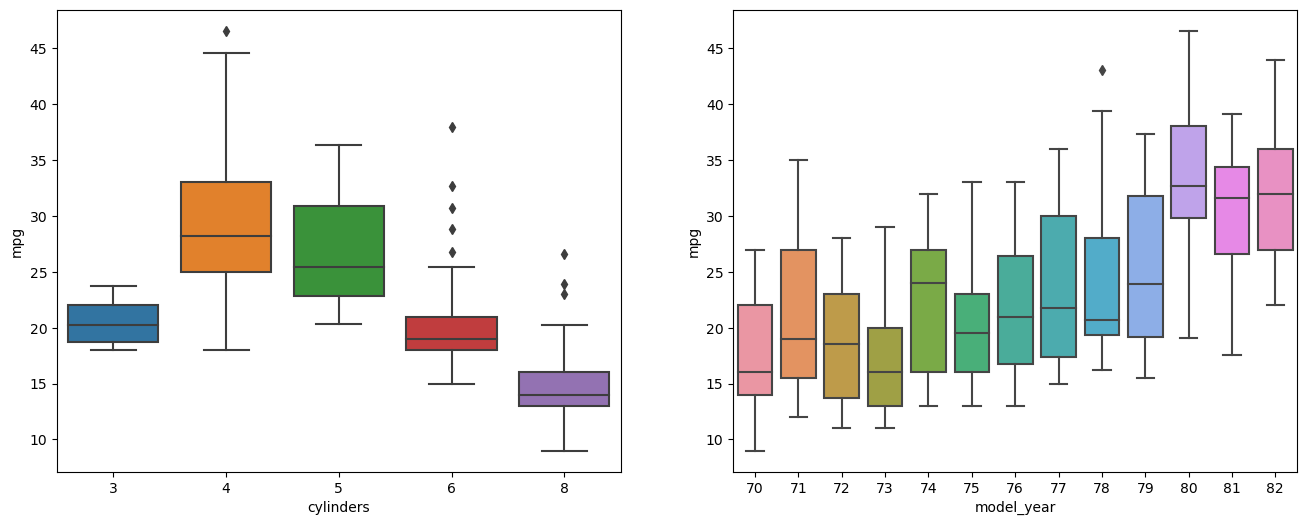

In [83]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
sns.boxplot(data=df,x="cylinders",y="mpg",ax=ax1)
sns.boxplot(data=df,x="model_year",y="mpg",ax=ax2)

1.With the increase in cylinder first the MPG increase then decreases.
2.With increase in model version the MPG increases.

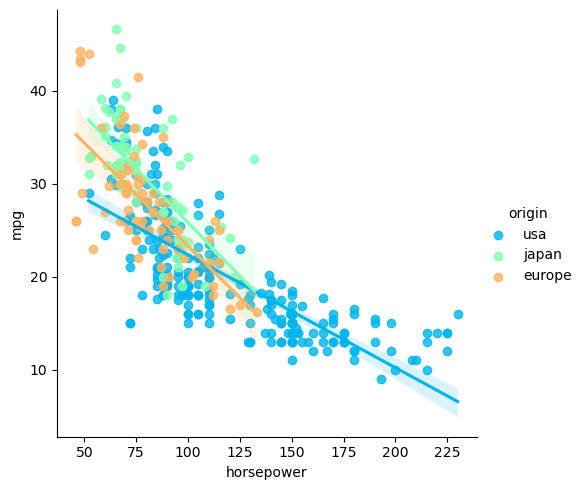

In [85]:
sns.lmplot(x="horsepower",y="mpg",hue="origin",data=df,palette="rainbow")

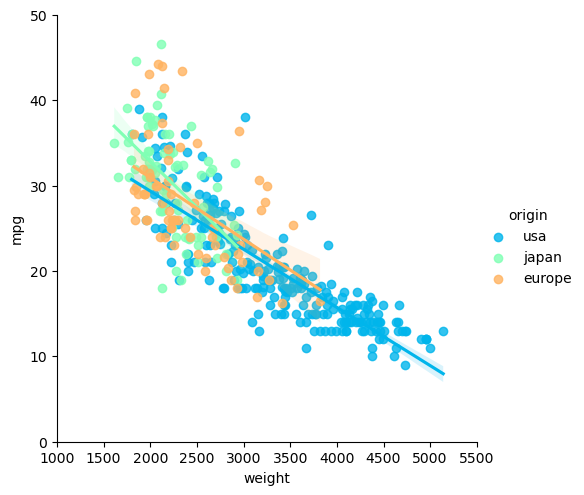

In [92]:
graph=sns.lmplot(data=df,x="weight",y="mpg",hue="origin",palette='rainbow')
graph.set(xlim=(1000,5500))
graph.set(ylim=(0,50))

<Axes: >

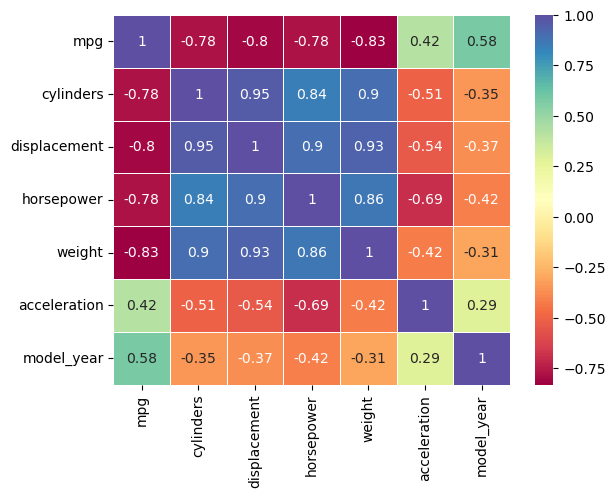

In [97]:
dff=df
dff.drop(["name"],axis=1,inplace=True)
sns.heatmap(dff.corr(),annot=True,linewidth=0.5,cmap="Spectral")

In [107]:
df.drop(["acceleration","displacement"],inplace=True,axis=1)

In [109]:
pd.get_dummies(df["origin"])

,europe,japan,usa
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
393,False,False,True
394,True,False,False
395,False,False,True
396,False,False,True


In [110]:
df

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa
...,...,...,...,...,...,...
393,27.0,4,86.0,2790,1982,usa
394,44.0,4,52.0,2130,1982,europe
395,32.0,4,84.0,2295,1982,usa
396,28.0,4,79.0,2625,1982,usa


In [111]:
from datetime import datetime
today=datetime.today()
today

datetime.datetime(2024, 6, 10, 12, 21, 38, 372283)

In [115]:
df["age"]=today.year-df["model_year"]
#df.drop(["age"],axis=1,inplace=True)
df

,mpg,cylinders,horsepower,weight,model_year,origin,age
0,18.0,8,130.0,3504,1970,usa,54
1,15.0,8,165.0,3693,1970,usa,54
2,18.0,8,150.0,3436,1970,usa,54
3,16.0,8,150.0,3433,1970,usa,54
4,17.0,8,140.0,3449,1970,usa,54
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,1982,usa,42
394,44.0,4,52.0,2130,1982,europe,42
395,32.0,4,84.0,2295,1982,usa,42
396,28.0,4,79.0,2625,1982,usa,42


In [116]:
df.drop(["model_year"],axis=1,inplace=True)

In [121]:
df_origin=pd.get_dummies(df["origin"])
df_origin

,europe,japan,usa
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
393,False,False,True
394,True,False,False
395,False,False,True
396,False,False,True


In [122]:
df_origin["europe"]=df_origin["europe"].map({False: 0,True: 1})
df_origin["japan"]=df_origin["japan"].map({False: 0,True: 1})
df_origin["usa"]=df_origin["usa"].map({False: 0,True: 1})
df_origin

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


In [124]:
df=pd.concat([df,df_origin],axis=1)
df

,mpg,cylinders,horsepower,weight,origin,age,europe,japan,usa
0,18.0,8,130.0,3504,usa,54,0,0,1
1,15.0,8,165.0,3693,usa,54,0,0,1
2,18.0,8,150.0,3436,usa,54,0,0,1
3,16.0,8,150.0,3433,usa,54,0,0,1
4,17.0,8,140.0,3449,usa,54,0,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,usa,42,0,0,1
394,44.0,4,52.0,2130,europe,42,1,0,0
395,32.0,4,84.0,2295,usa,42,0,0,1
396,28.0,4,79.0,2625,usa,42,0,0,1


In [125]:
df.drop(["origin"],axis=1,inplace=True)

In [126]:
df

,mpg,cylinders,horsepower,weight,age,europe,japan,usa
0,18.0,8,130.0,3504,54,0,0,1
1,15.0,8,165.0,3693,54,0,0,1
2,18.0,8,150.0,3436,54,0,0,1
3,16.0,8,150.0,3433,54,0,0,1
4,17.0,8,140.0,3449,54,0,0,1
...,...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,42,0,0,1
394,44.0,4,52.0,2130,42,1,0,0
395,32.0,4,84.0,2295,42,0,0,1
396,28.0,4,79.0,2625,42,0,0,1


In [127]:
df_final=df

In [128]:
X=df.drop(["mpg"],axis=1)
Y=df["mpg"]

In [147]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
model=LinearRegression()
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
model.fit(X_train,Y_train)
Y_preds=model.predict(X_test)

In [148]:
pd.DataFrame({"Y_true":Y_test,
              "Y_preds":Y_preds
})

,Y_true,Y_preds
198,33.0,32.076671
396,28.0,29.339974
33,19.0,20.914654
208,13.0,17.117514
93,14.0,12.820363
...,...,...
249,19.9,22.682942
225,17.5,20.154780
367,28.0,29.388848
175,29.0,30.485851


In [149]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def evaluation_metric(Y_test,Y_preds):
    MSE=mean_squared_error(Y_test,Y_preds)
    MAE=mean_absolute_error(Y_test,Y_preds)
    RMSE=np.sqrt(MSE)
    R2=r2_score(Y_test,Y_preds)
    return print("r2_score:", R2, "\n","mae:", MAE, "\n","mse:",MSE, "\n","rmse:",RMSE)
    

In [134]:
evaluation_metric(Y_test,Y_preds)

r2_score: 0.8332558127965363 
 mae: 2.3277289815462785 
 mse: 8.965241961914504 
 rmse: 2.9942013896721282


In [150]:
model.score(X_test,Y_test)

0.833255812796536

In [144]:
df["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [162]:
cvs=cross_val_score(model,X_scaled,Y,cv=200,scoring='neg_mean_squared_error')

In [163]:
cvs.mean()

-11.81189026488215